This tutorial was done using [DataCamp's example.](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

![image](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

In [1]:
import pandas as pd

In [2]:
cols = [
    "pregnant",
    "glucose",
    "bp",
    "skin",
    "insulin",
    "bmi",
    "pedigree",
    "age",
    "label",
]

diabetes = pd.read_csv("pima-indians-diabetes.csv", header=None, names=cols)
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree"]
X = diabetes[feature_cols]
y = diabetes.label

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)

(537, 7) (537,)


In [5]:
print(X_test.shape, y_test.shape)

(231, 7) (231,)


In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, accuracy_score

In [9]:
accuracy_score1 = accuracy_score(y_test, y_pred)
print(accuracy_score1)

0.6536796536796536


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       146
           1       0.53      0.47      0.50        85

    accuracy                           0.65       231
   macro avg       0.62      0.62      0.62       231
weighted avg       0.65      0.65      0.65       231



### Visualizing decision trees 

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

D:\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


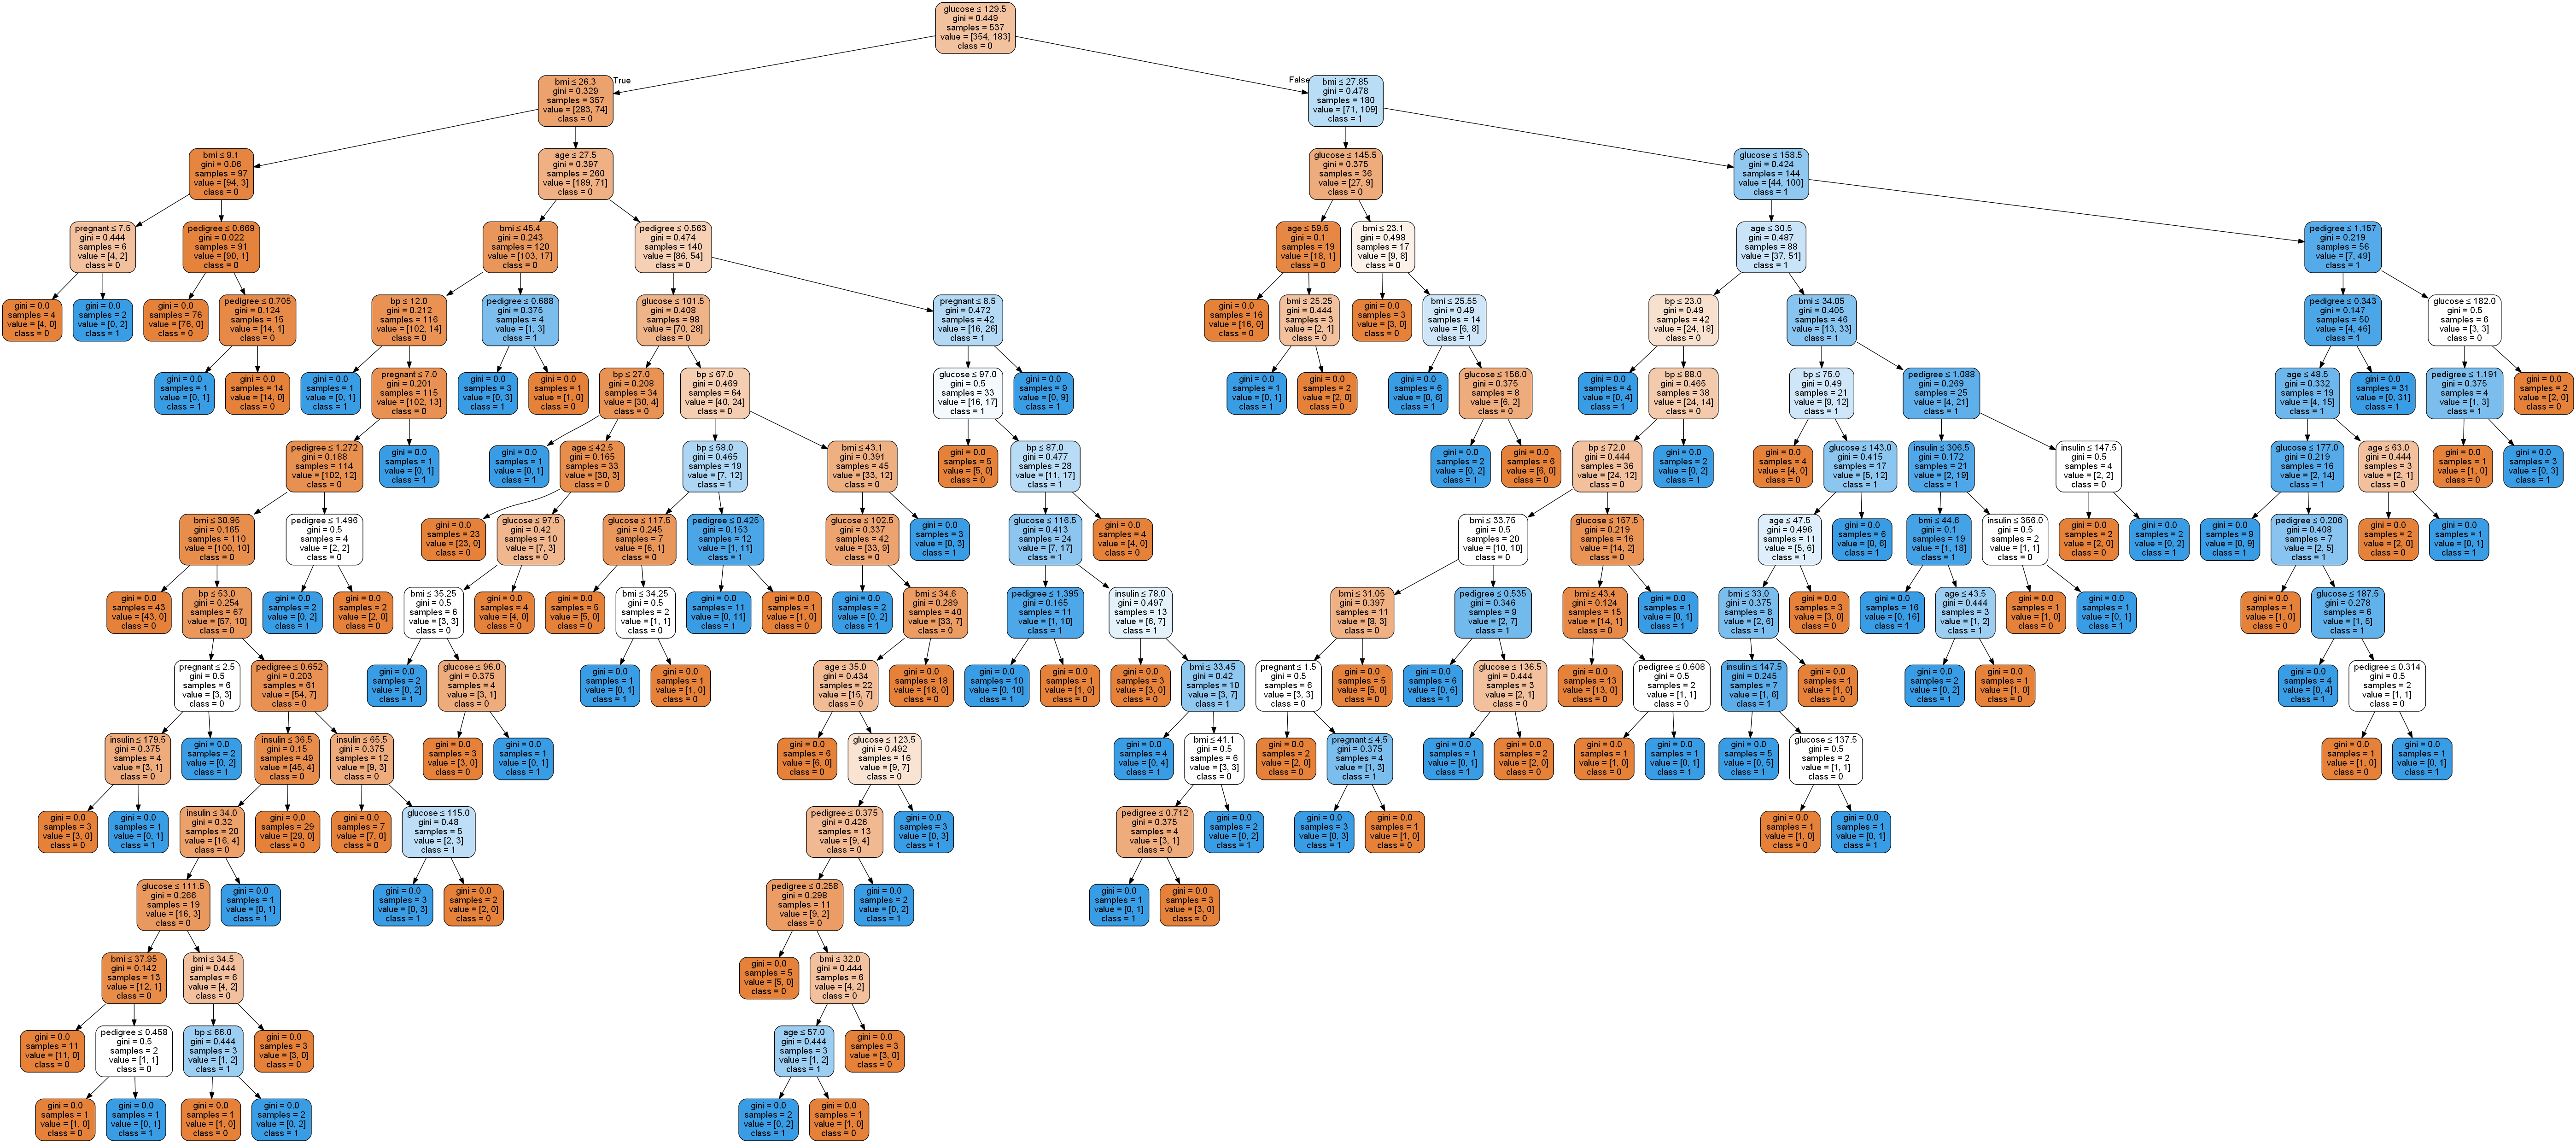

In [12]:
dot_data = StringIO()
export_graphviz(
    model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=["0", "1"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

### Pruning the decision tree to improve accuracy 

In [13]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [15]:
accuracy_score2 = accuracy_score(y_test, y_pred)

In [16]:
print(
    "The accuracy score has improved from {} to {} after pruning the decision tree.".format(
        round(accuracy_score1, 2), round(accuracy_score2, 2)
    )
)

The accuracy score has improved from 0.65 to 0.77 after pruning the decision tree.


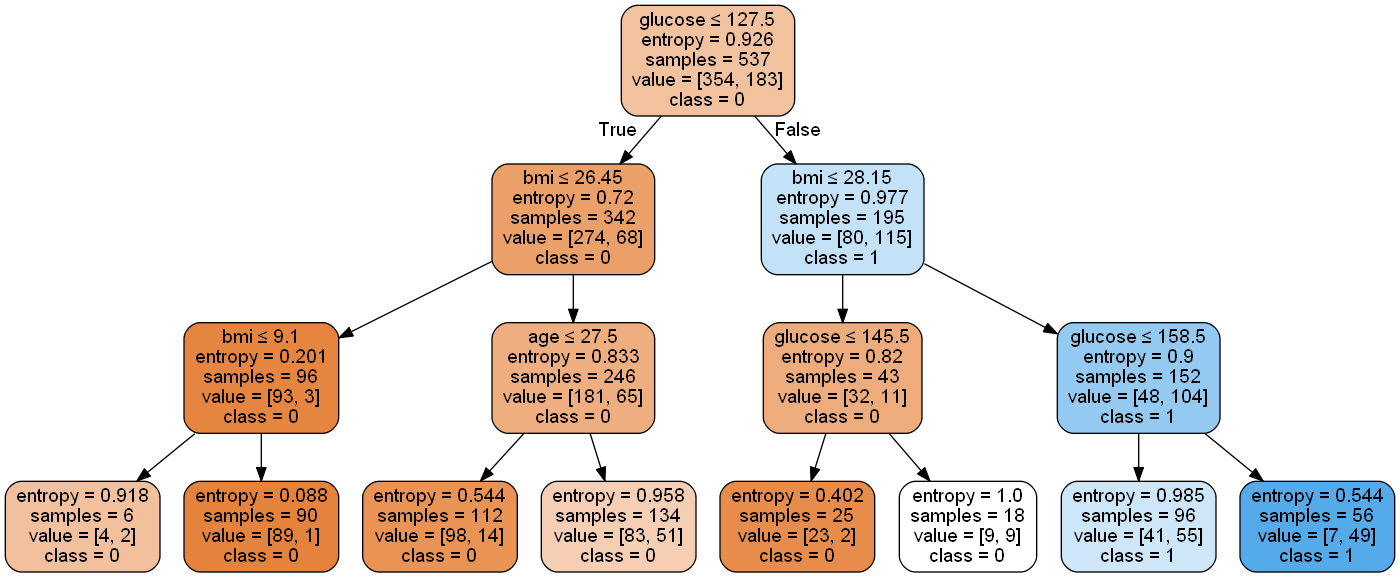

In [17]:
dot_data = StringIO()
export_graphviz(
    model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=["0", "1"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())